In [ ]:
#gpu

In [1]:
!pip install diffusers transformers safetensors accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 27.7 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import DiffusionPipeline,StableDiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Pixel Art

In [3]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors")
imagem = pipeline( "pixel art arcade aircraft", num_inference_steps=100).images[0]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

pixel-art-xl.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

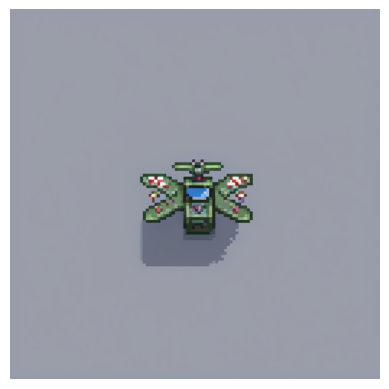

In [4]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Caricaturas

In [5]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("Norod78/SDXL-Caricaturized-Lora", weight_name="SDXL-Caricaturized-Lora.safetensors")
imagem = pipeline( "Tom Cruise Caricaturized Very detailed, clean, high quality, sharp image.").images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

SDXL-Caricaturized-Lora.safetensors:   0%|          | 0.00/58.0M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/loaders/lora.py:708: FutureWarning: `_modify_text_encoder` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_modify_text_encoder", "0.25", LORA_DEPRECATION_MESSAGE)
/usr/local/lib/python3.10/dist-packages/diffusers/loaders/lora.py:679: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


  0%|          | 0/50 [00:00<?, ?it/s]

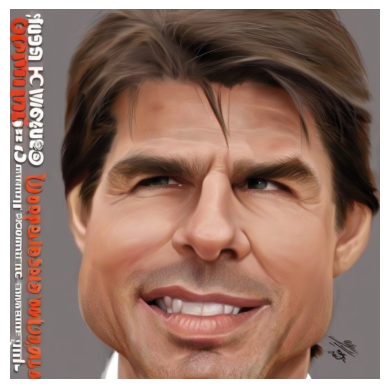

In [6]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Robôs

In [7]:
prompt = "A realistic image of a Robot with a gun."
num_inference_steps=32
guidance_scale=5.0

In [8]:
scheduler = EulerDiscreteScheduler.from_pretrained("nousr/robo-diffusion-2-base", subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained("nousr/robo-diffusion-2-base", scheduler=scheduler,
                                                   torch_dtype=torch.float16).to("cuda")
imagem = pipeline(prompt=prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/742 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

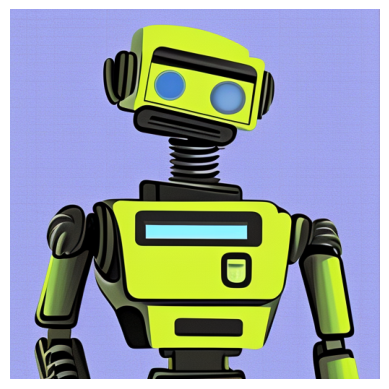

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()